In [1]:
%matplotlib inline

from database.DataBaseModels import *

import pygal
import networkx as nx

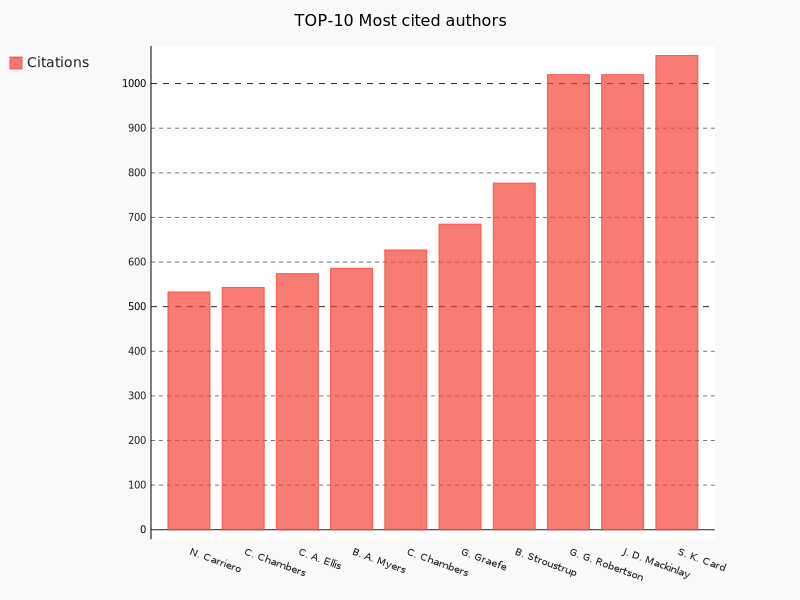

In [2]:
authors_list = [author for author in reversed(db.Author.select().order_by(desc(db.Author.citations_counter))[:10])]
authors_name = []

for author in authors_list:
    result = ''
    name = author.name.split(' ')
    for word in name:
        if word != name[-1]:
            result += '{0}. '.format(word[0])
        else:
            result += word
    authors_name.append(result)

chart = pygal.Bar(x_label_rotation=20)

chart.add('Citations', [author.citations_counter for author in authors_list])
chart.title = 'TOP-10 Most cited authors'
chart.x_labels = authors_name
# chart.render_in_browser()
chart.render_to_png('visualization/top10_most_cited_authors.svg')
chart